In [104]:
import pandas as pd
from ISLP import load_data
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [41]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [42]:
dataset=pd.DataFrame(Carseats)

In [43]:
data=dataset[["Sales", "Price", "Urban", "US"]]

In [44]:
labeler=LabelEncoder()

In [45]:
urban_label=labeler.fit_transform(data["Urban"])
us_label=labeler.fit_transform(data["US"])

In [46]:
data["Urban"]=pd.Series(urban_label)
data["US"]=pd.Series(us_label)

(array([ 4.,  1.,  1.,  3.,  5.,  8.,  9., 16., 22., 33., 25., 25., 33.,
        25., 31., 25., 30., 24., 13., 16., 11., 11.,  9.,  9.,  6.,  1.,
         1.,  1.,  1.,  1.]),
 array([ 0.        ,  0.54233333,  1.08466667,  1.627     ,  2.16933333,
         2.71166667,  3.254     ,  3.79633333,  4.33866667,  4.881     ,
         5.42333333,  5.96566667,  6.508     ,  7.05033333,  7.59266667,
         8.135     ,  8.67733333,  9.21966667,  9.762     , 10.30433333,
        10.84666667, 11.389     , 11.93133333, 12.47366667, 13.016     ,
        13.55833333, 14.10066667, 14.643     , 15.18533333, 15.72766667,
        16.27      ]),
 <BarContainer object of 30 artists>)

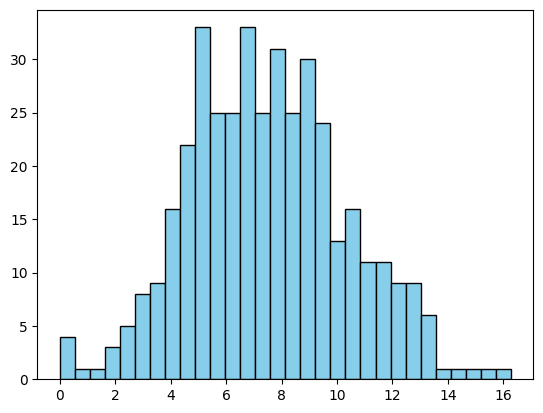

In [74]:
plt.hist(data["Sales"], bins=30, color='skyblue', edgecolor='black')

(array([ 1.,  0.,  0.,  0.,  1.,  3.,  0.,  4., 10.,  5., 11., 20., 25.,
        28., 38., 36., 28., 42., 37., 41., 17., 14., 15.,  8.,  9.,  3.,
         2.,  0.,  1.,  1.]),
 array([ 24.        ,  29.56666667,  35.13333333,  40.7       ,
         46.26666667,  51.83333333,  57.4       ,  62.96666667,
         68.53333333,  74.1       ,  79.66666667,  85.23333333,
         90.8       ,  96.36666667, 101.93333333, 107.5       ,
        113.06666667, 118.63333333, 124.2       , 129.76666667,
        135.33333333, 140.9       , 146.46666667, 152.03333333,
        157.6       , 163.16666667, 168.73333333, 174.3       ,
        179.86666667, 185.43333333, 191.        ]),
 <BarContainer object of 30 artists>)

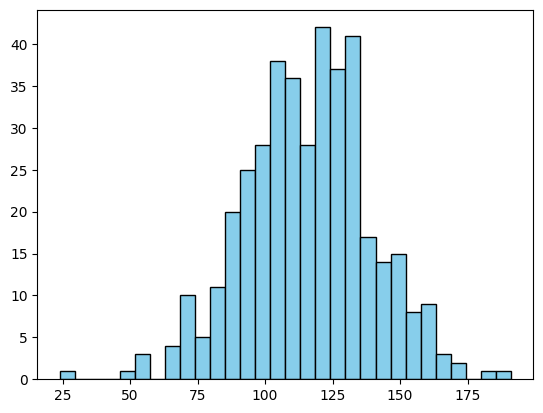

In [75]:
plt.hist(data["Price"], bins=30, color='skyblue', edgecolor='black')

(array([118.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 282.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

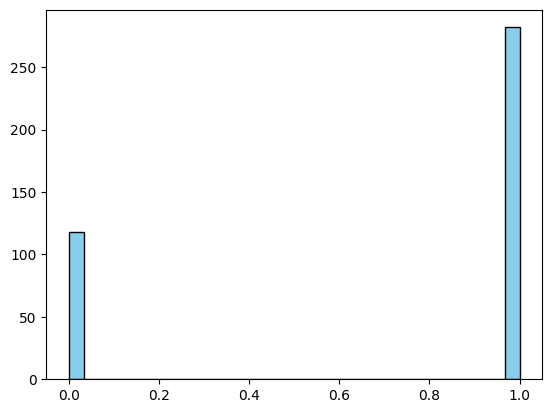

In [76]:
plt.hist(data["Urban"], bins=30, color='skyblue', edgecolor='black')

(array([142.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 258.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

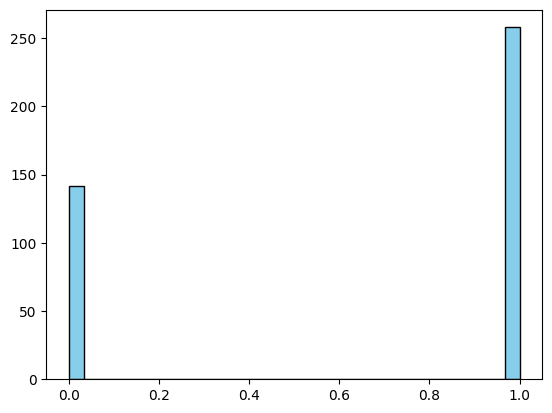

In [77]:
plt.hist(data["US"], bins=30, color='skyblue', edgecolor='black')

In [79]:
def IntQ(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return ("Outliers:", outliers)

In [86]:
IntQ(data["Sales"])

('Outliers:',
 316    15.63
 376    16.27
 Name: Sales, dtype: float64)

In [81]:
IntQ(data["Price"])

('Outliers:',
 42      24
 125     49
 165    191
 174    185
 367     53
 Name: Price, dtype: int64)

In [82]:
IntQ(data["Urban"])

('Outliers:', Series([], Name: Urban, dtype: int32))

In [83]:
IntQ(data["US"])

('Outliers:', Series([], Name: US, dtype: int32))

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   400 non-null    float64
 1   Price   400 non-null    int64  
 2   Urban   400 non-null    int32  
 3   US      400 non-null    int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 9.5 KB


In [48]:
X_train, X_test, y_train, y_test=train_test_split(data[["Price", "Urban", "US"]], data["Sales"], test_size=.2, random_state=123)

In [56]:
x_const=sm.add_constant(X_train)

In [57]:
model=sm.OLS(y_train, x_const).fit()

In [65]:
conf_interval=model.conf_int(alpha=.05)
print (f"Confidence Interval for First Model {conf_interval}")

Confidence Interval for First Model                0          1
const  11.934483  14.846656
Price  -0.068460  -0.045138
Urban  -0.741642   0.474776
US      0.634956   1.777033


In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     35.43
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           9.14e-20
Time:                        19:33:14   Log-Likelihood:                -745.89
No. Observations:                 320   AIC:                             1500.
Df Residuals:                     316   BIC:                             1515.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3906      0.740     18.094      0.000      11.934      14.847
Price         -0.0568      0.006     -9.583      0.000      -0.068      -0.045
Urban         -0.1334      0.309     -0.432      0.666      -0.742       0.475
US             1.2060      0.290      4.155      0.000       0.635       1.777
==============================================================================
Omnibus:                        0.871   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.841
Skew:                           0.125   Prob(JB):                        0.657
Kurtosis:                       2.973   Cond. No.                         636.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
x_const2=sm.add_constant(X_train[["Price", "US"]])
model2=sm.OLS(y_train, x_const2).fit()
conf_interval=model2.conf_int(alpha=.05)
print (f"Confidence Interval for Second Model {conf_interval}\n\n")
model2.summary()                         

Confidence Interval for Second Model                0          1
const  11.901959  14.730419
Price  -0.068576  -0.045326
US      0.632039   1.772072




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     53.19
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           1.21e-20
Time:                        17:55:18   Log-Likelihood:                -745.98
No. Observations:                 320   AIC:                             1498.
Df Residuals:                     317   BIC:                             1509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3162      0.719     18.525      0.000      11.902      14.730
Price         -0.0570      0.006     -9.638      0.000      -0.069      -0.045
US             1.2021      0.290      4.149      0.000       0.632       1.772
==============================================================================
Omnibus:                        0.770   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.758
Skew:                           0.118   Prob(JB):                        0.685
Kurtosis:                       2.963   Cond. No.                         615.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
rm_indexes=IntQ(data["Sales"])[1].index.tolist()+IntQ(data["Price"])[1].index.tolist()

In [96]:
data2=data.drop(index=rm_indexes)

In [99]:
X_train2, X_test2, y_train2, y_test2=train_test_split(data2[["Price", "Urban", "US"]], data2["Sales"], test_size=.2, random_state=42)

In [101]:
x_const3=sm.add_constant(X_train2)
model3=sm.OLS(y_train2, x_const3).fit()

In [102]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     21.60
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           9.92e-13
Time:                        18:51:58   Log-Likelihood:                -715.34
No. Observations:                 314   AIC:                             1439.
Df Residuals:                     310   BIC:                             1454.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0070      0.773     14.240      0.000       9.486      12.528
Price         -0.0397      0.006     -6.500      0.000      -0.052      -0.028
Urban          0.1496      0.296      0.506      0.613      -0.432       0.732
US             1.3539      0.282      4.802      0.000       0.799       1.909
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.228
Skew:                           0.000   Prob(JB):                        0.892
Kurtosis:                       2.868   Cond. No.                         691.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""